<a href="https://colab.research.google.com/github/GihoonE/ML-DL/blob/main/ConvolutionANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1)/255.0
train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2, random_state = 42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print(train_scaled.shape)

(48000, 28, 28, 1)


In [3]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size = 3,activation = 'relu',padding='same',input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

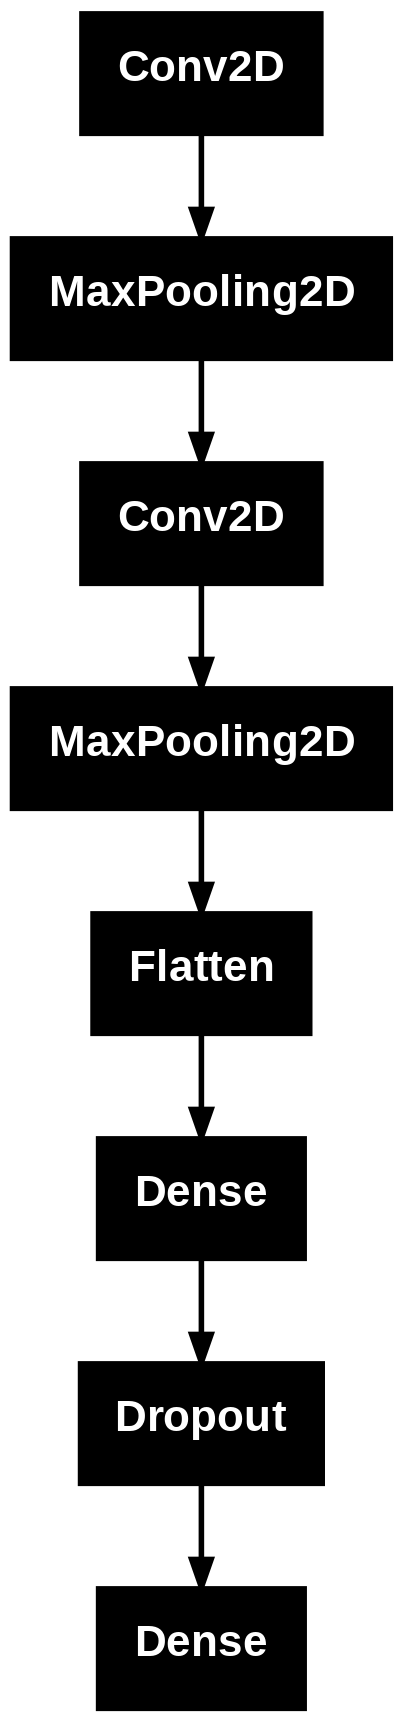

In [4]:
keras.utils.plot_model(model)

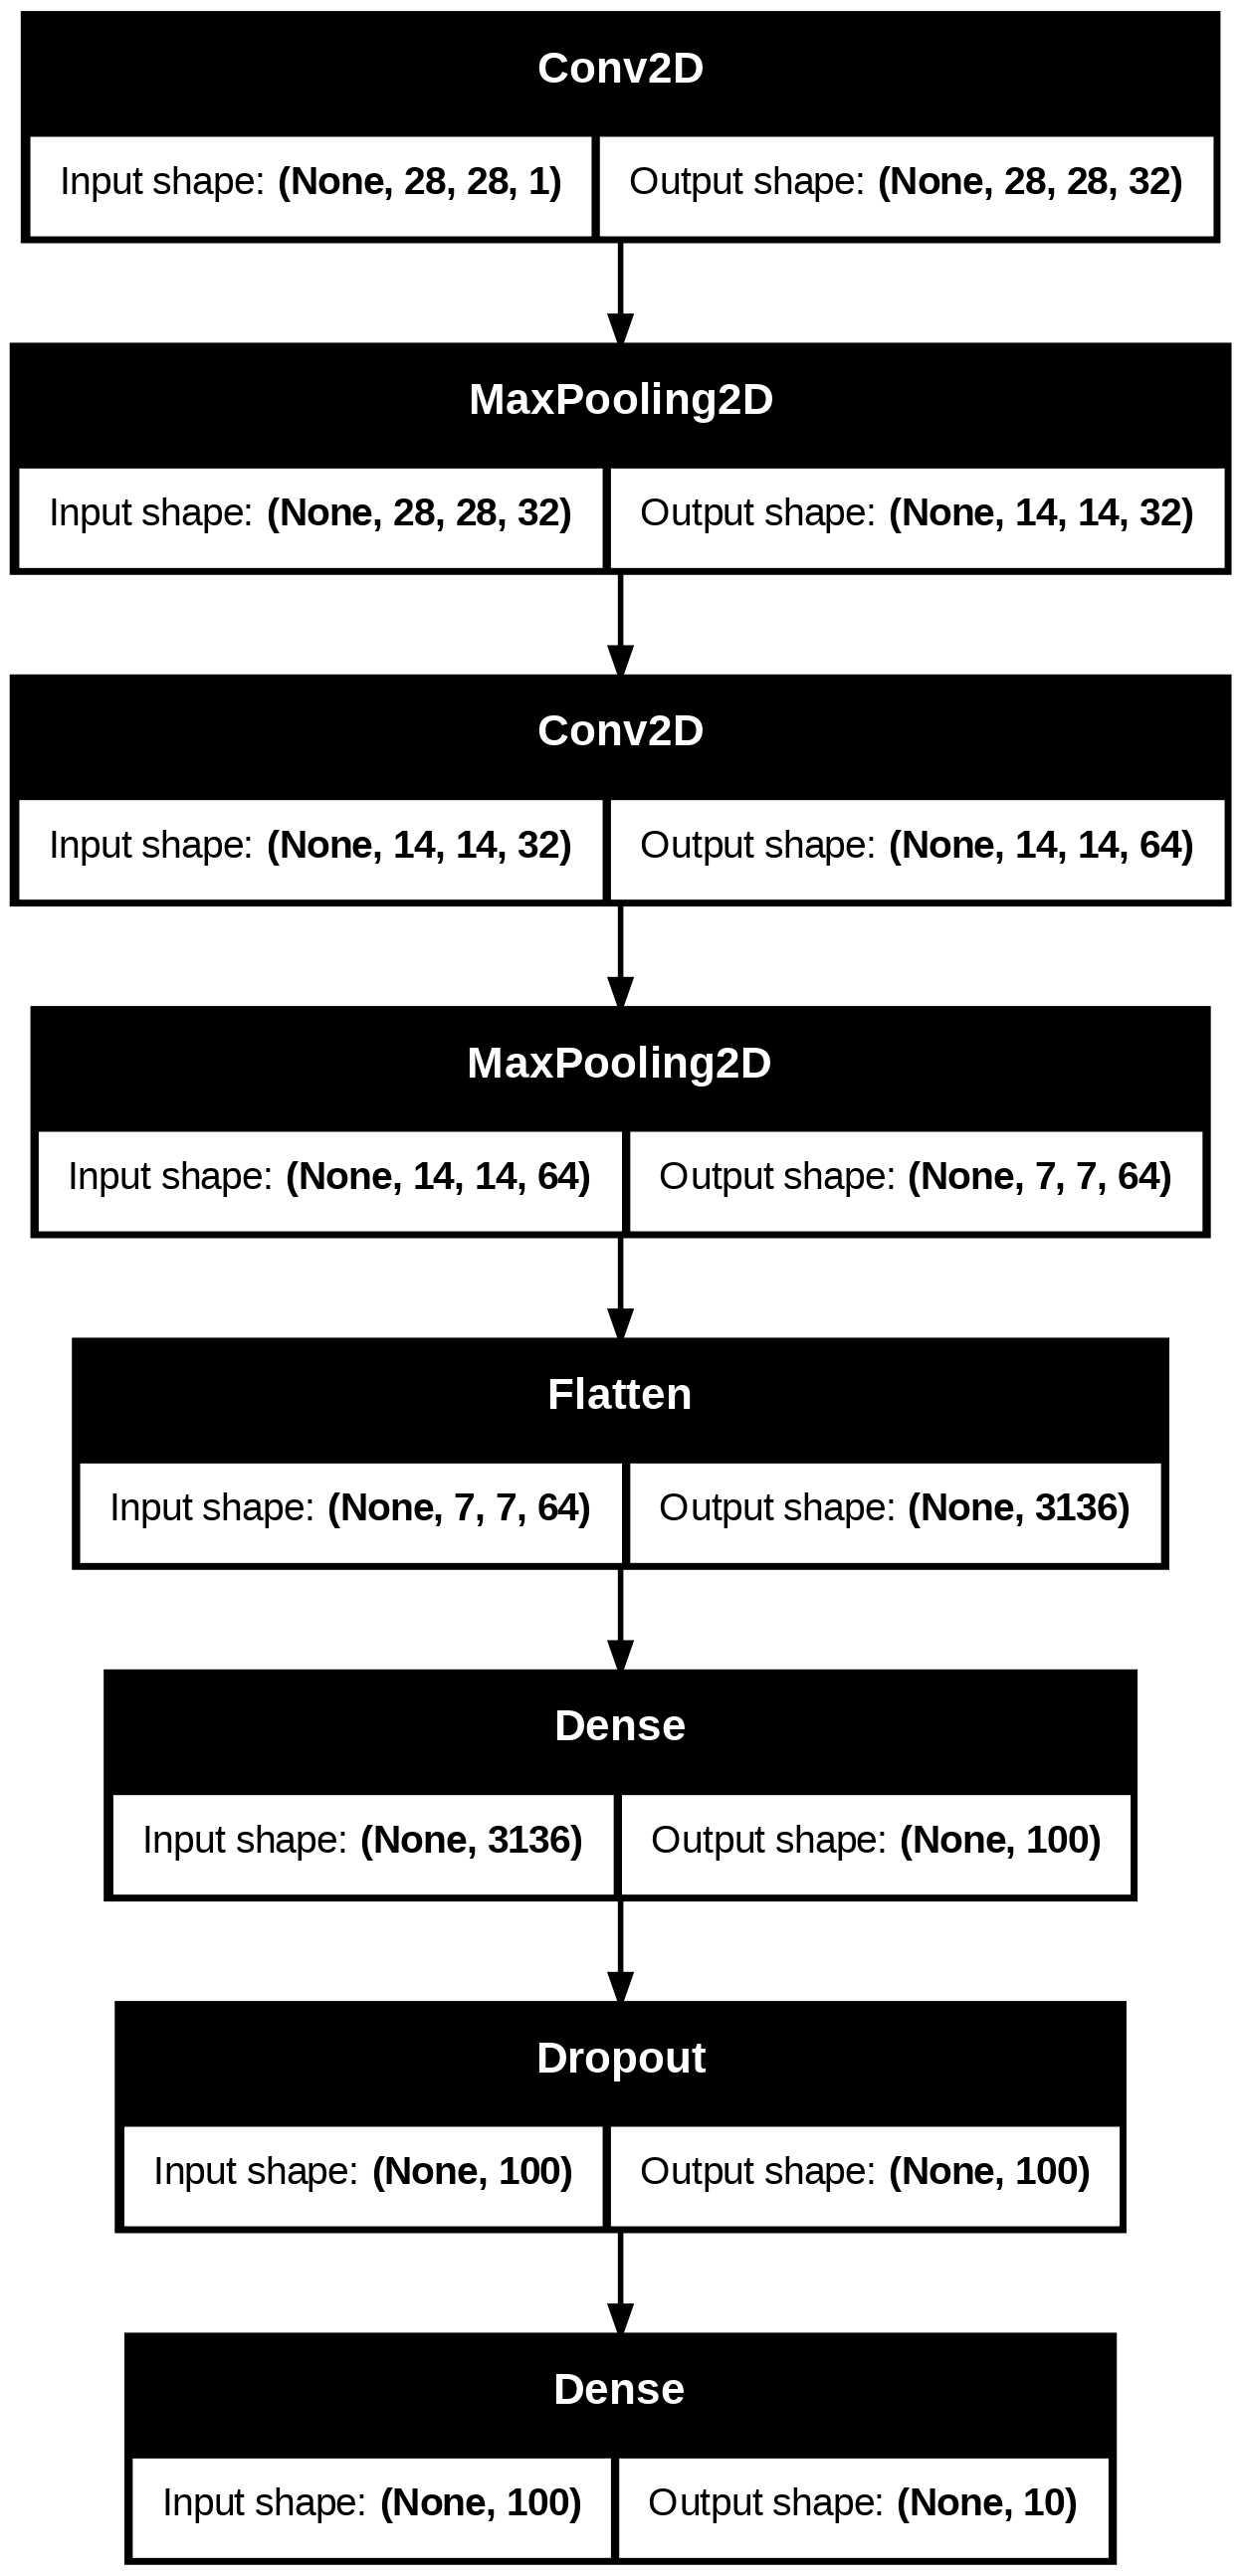

In [5]:
keras.utils.plot_model(model,show_shapes=True)

In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7528 - loss: 0.6968 - val_accuracy: 0.8854 - val_loss: 0.3159
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.8732 - loss: 0.3554 - val_accuracy: 0.8973 - val_loss: 0.2822
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8907 - loss: 0.3039 - val_accuracy: 0.9055 - val_loss: 0.2555
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9073 - loss: 0.2546 - val_accuracy: 0.9118 - val_loss: 0.2391
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9127 - loss: 0.2363 - val_accuracy: 0.9064 - val_loss: 0.2533
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9214 - loss: 0.2124 - val_accuracy: 0.9191 - val_loss: 0.2210
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9267 - loss: 0.1960 - val_accuracy: 0.9183 - val_loss: 0.2282
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9319 - loss: 0.180

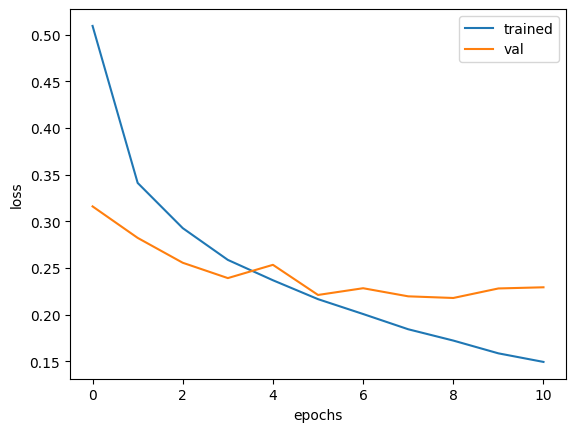

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['trained','val'])
plt.show()

In [8]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9249 - loss: 0.2099


[0.21779650449752808, 0.92166668176651]

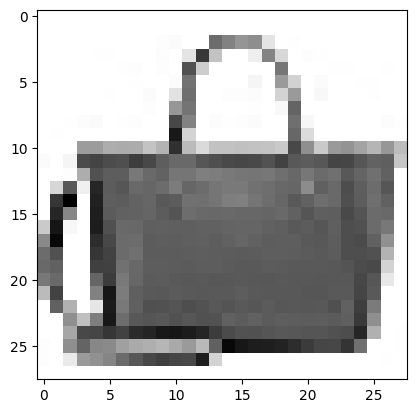

In [9]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [10]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
[[5.6604434e-21 8.9455726e-29 6.1538496e-22 1.3242243e-22 2.4241429e-17
  3.0071220e-21 8.2250375e-20 2.4670135e-21 1.0000000e+00 2.3971117e-21]]


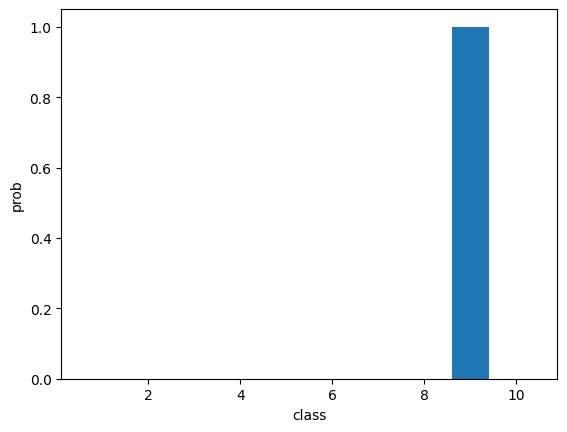

In [11]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [12]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']
import numpy as np
print(classes[np.argmax(preds)])

가방


In [13]:
test_scaled = test_input.reshape(-1,28,28,1)/255.0
model.evaluate(test_scaled,test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9141 - loss: 0.2443


[0.2372855693101883, 0.9154000282287598]

(3, 3, 1, 32) (32,)
-0.009465985 0.22690296


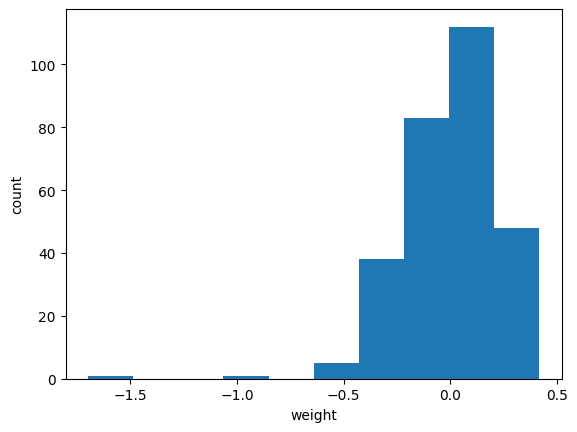

In [14]:
model = keras.models.load_model('best-cnn-model.keras')
model.layers
conv = model.layers[0]
print(conv.weights[0].shape,conv.weights[1].shape)
conv_weights = conv.weights[0].numpy()
print(np.mean(conv_weights),np.std(conv_weights))
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

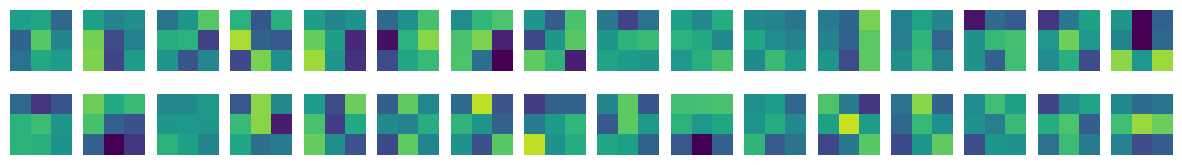

In [15]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin = -0.5,vmax = 0.5)
    axs[i,j].axis('off')
plt.show()

(3, 3, 1, 32)
-0.0031533288 0.08412097


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


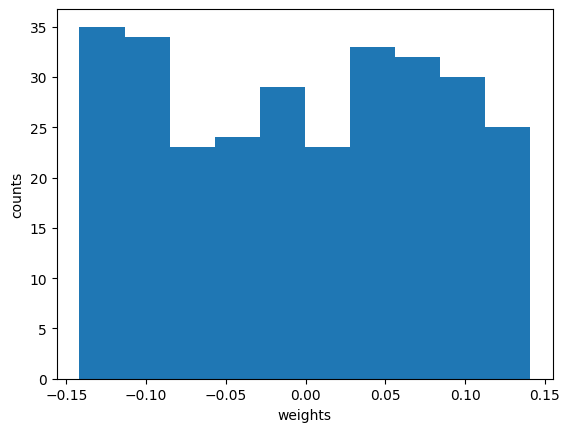

In [16]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)
no_training_weights = no_training_conv.weights[0].numpy()
print(np.mean(no_training_weights),np.std(no_training_weights))
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('counts')
plt.show()

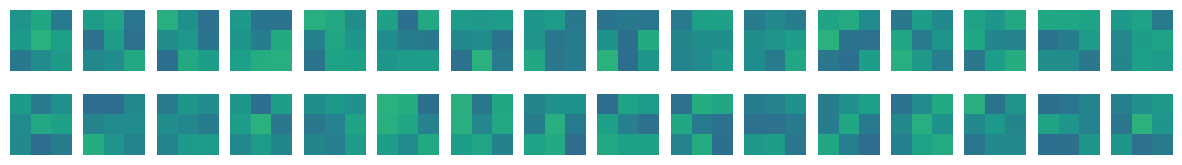

In [17]:
fig,axs = plt.subplots(2,16,figsize = (15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
plt.show()

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]


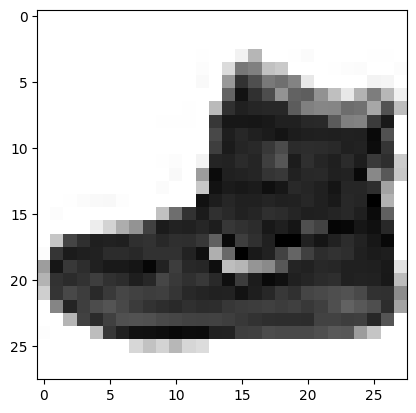

In [18]:
inputs = keras.Input(shape = (784,))
print(model.inputs)
conv_acti = keras.Model(model.inputs,model.layers[0].output)
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

(28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(28, 28, 1))
  warnings.warn(msg)


(28, 28, 1, 32)


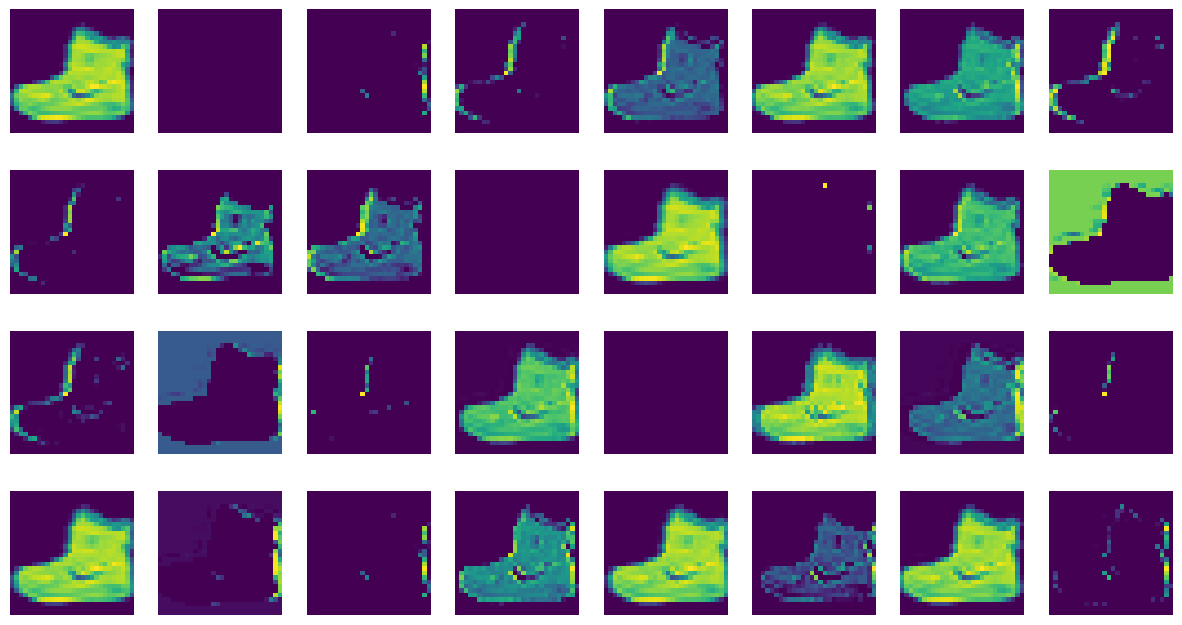

In [19]:
inputs = train_input[0:1].reshape(28,28,1)/255.0
print(inputs.shape)
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)
fig,axs = plt.subplots(4,8,figsize = (15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[:,:,0,8*i+j])
    axs[i,j].axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


(1, 14, 14, 64)


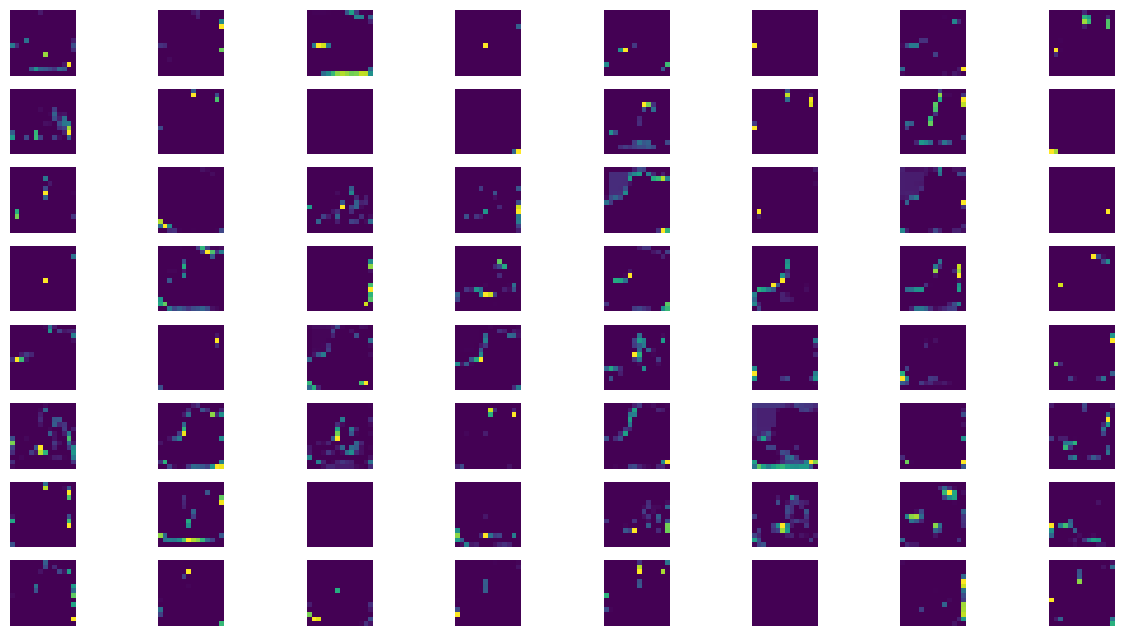

In [20]:
conv2_acti = keras.Model(model.inputs,model.layers[2].output)
inputs = train_input[0].reshape(-1,28,28,1)/255.0
feature_maps = conv2_acti.predict(inputs)
print(feature_maps.shape)
fig,axs = plt.subplots(8,8,figsize=(15,8))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,8*i+j])
    axs[i,j].axis('off')
plt.show()

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,580 (3.82 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 667,054 (2.54 MB)